In [1]:
import os
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

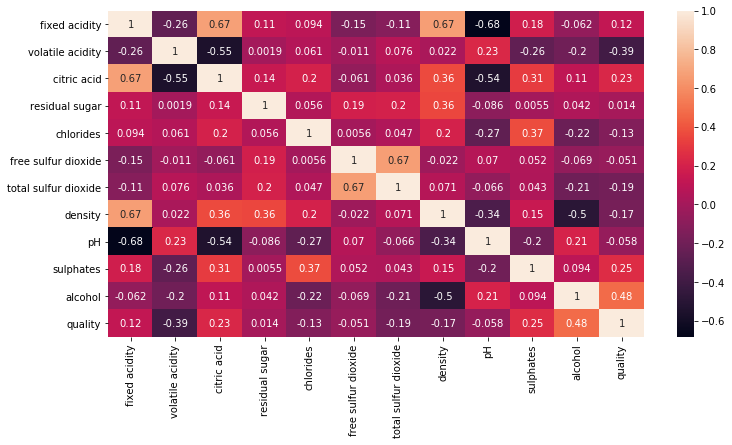

In [3]:
#Correlacao entre os dados, fig 1
plt.figure(figsize=(12, 6))
sb.heatmap(red.corr(), annot=True) #funcao do heatmap para a ocorrencia dos valores e suas relações

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

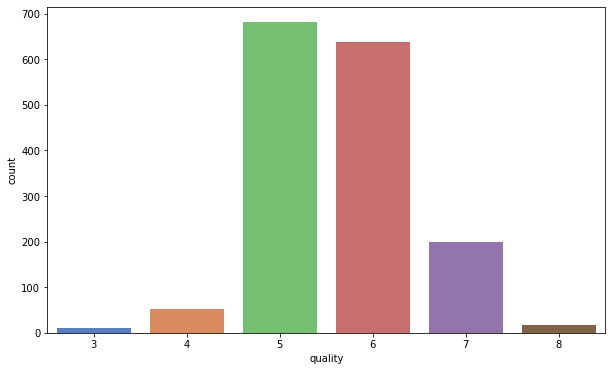

In [4]:
#explorando o atributo qualidade, fig 2
plt.figure(figsize=(10, 6)) #tamanho da figura
sb.countplot(red["quality"], palette="muted")
red["quality"].value_counts() #contar quantos vinhos de tal qualidade tem

In [5]:
#Os dados nao estao balanceados e agora? Nao tem problema pois queremos saber se um vinho e bom, muito bom ou ruim.
#Para isso vamos criar uma nova coluna chamada "Taste(Gosto)"

In [6]:
taste = []
for i in red['quality']:
    if i >= 1 and i <= 5:
        taste.append('0')
    elif i >= 6 and i <= 10:
        taste.append('1')
red['taste'] = taste

In [7]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [8]:
red['taste'].value_counts()

1    855
0    744
Name: taste, dtype: int64

1    855
0    744
Name: taste, dtype: int64

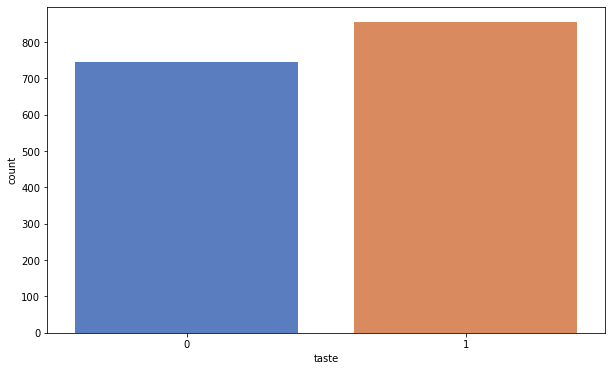

In [9]:
#explorando o atributo qualidade, fig 2
plt.figure(figsize=(10, 6)) #tamanho da figura
sb.countplot(red["taste"], palette="muted")
red["taste"].value_counts() #contar quantos vinhos de tal qualidade tem

In [10]:
X = red.iloc[:,:11] 
y=red['taste']

In [11]:
std = StandardScaler()
X =std.fit_transform(X)

#scaled features
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


# KNN

In [13]:
#Usando o método de Kfold para ter mais precisão sobre os nossos resultados
 
skfold = StratifiedKFold(n_splits=10) # o númeoro 10 é usado como padrão

predicted_y = []
expected_y = []

# partição dos dados
for train_index, test_index in skfold.split(X, y):
    # specific ".loc" syntax for working with dataframes
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [14]:
knn = KNeighborsClassifier(n_neighbors=3) # K=3 aleatoriamente
knn.fit(X_train, y_train) #treinando
pred_knn = knn.predict(X_test) 

In [15]:
pred_knn

array(['0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0',
       '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1'], dtype=object)

In [16]:
print('Test accuracy for KNN is:',metrics.accuracy_score(y_test,pred_knn)*100)  #Acurácia do algoritmo
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_knn))    #Matriz de confusão
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_knn))

print('Accuracy of K-NN classifier on training set: {:f}'
     .format(knn.score(X_train, y_train)))              
print('Accuracy of K-NN classifier on test set: {:f}'
     .format(knn.score(X_test, y_test)))


#print('Acucuracy with cross validation',cross_val_score(knn, X, y, cv=10, scoring ='accuracy').mean())

Test accuracy for KNN is: 65.40880503144653

Confusion matrix:
 [[40 34]
 [21 64]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.54      0.59        74
           1       0.65      0.75      0.70        85

    accuracy                           0.65       159
   macro avg       0.65      0.65      0.65       159
weighted avg       0.65      0.65      0.65       159

Accuracy of K-NN classifier on training set: 0.865972
Accuracy of K-NN classifier on test set: 0.654088


# Árvore de Decisão

In [17]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

pred_clf = clf.predict(X_test) #previsao dos testes

pred_clf

array(['1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0',
       '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '1'], dtype=object)

In [18]:
print('Test accuracy for Decision Tree is:',metrics.accuracy_score(y_test,pred_clf)*100)  #Acurácia do algoritmo
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_clf))    #Matriz de confusão
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_clf))

print('Accuracy of K-NN classifier on training set: {:f}'
     .format(clf.score(X_train, y_train)))              
print('Accuracy of K-NN classifier on test set: {:f}'
     .format(clf.score(X_test, y_test)))


#print('Acucuracy with cross validation',cross_val_score(clf, X, y, cv=10, scoring ='accuracy').mean())

Test accuracy for Decision Tree is: 62.264150943396224

Confusion matrix:
 [[40 34]
 [26 59]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.54      0.57        74
           1       0.63      0.69      0.66        85

    accuracy                           0.62       159
   macro avg       0.62      0.62      0.62       159
weighted avg       0.62      0.62      0.62       159

Accuracy of K-NN classifier on training set: 1.000000
Accuracy of K-NN classifier on test set: 0.622642
